In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import joblib

# Data Collection

In [2]:
data = pd.read_csv('Rainfall.csv')

In [3]:
data.head(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
data.shape

(366, 12)

In [5]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [7]:
# remove extra space from all columns
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [8]:
data.columns = data.columns.str.strip()

In [9]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
data = data.drop(columns=['day'])

In [12]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [13]:
# checking number of missing values 
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [14]:
# handle the missing values
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())


In [15]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [16]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [17]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
# Converting  yes and mo to -> 0,1
data['rainfall'] = data['rainfall'].map({"yes": 1,'no': 0})

In [19]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


# Exploratory Data Analysis -> EDA

In [20]:
data.shape

(366, 11)

In [21]:
# setting plot for all the plot 
sns.set(style = "whitegrid")

In [22]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [23]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

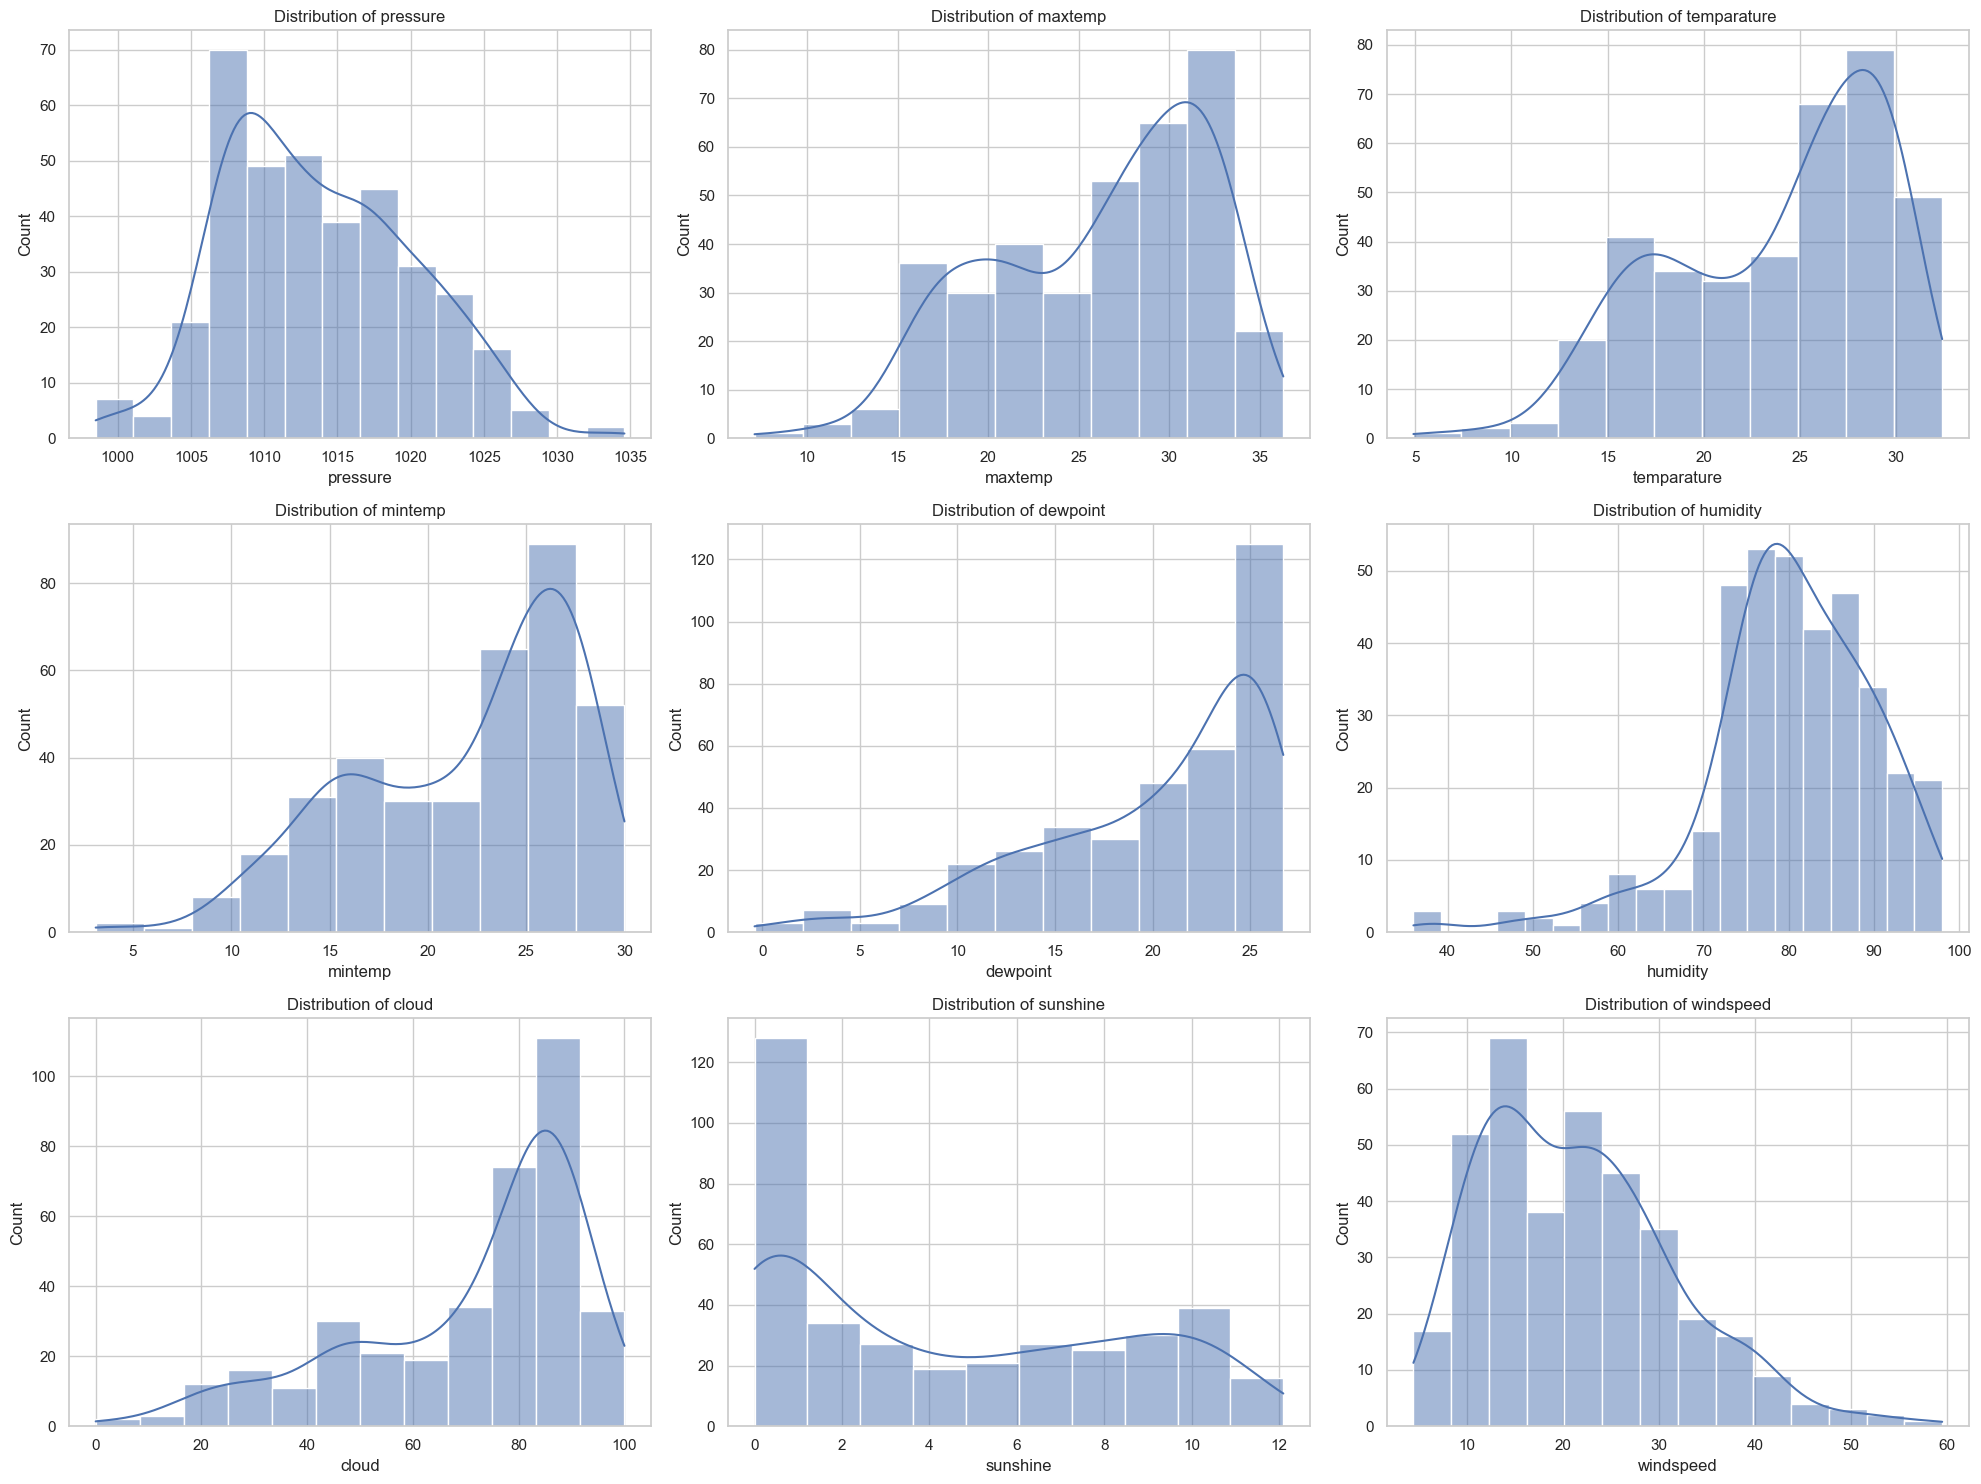

In [24]:
plt.figure(figsize=(20,15))  # adjust width & height

columns = ["pressure","maxtemp","temparature","mintemp",
           "dewpoint","humidity","cloud","sunshine","windspeed"]

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # use i instead of 1
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


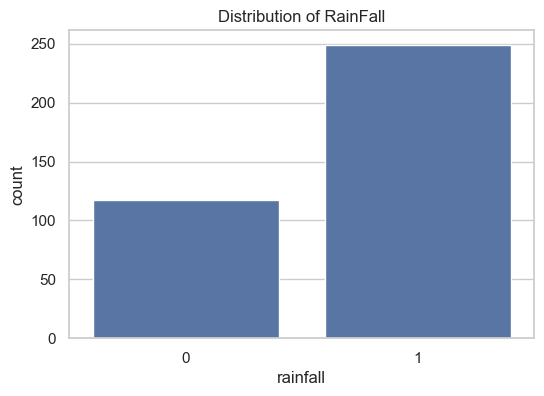

In [25]:
plt.figure(figsize = (6,4))
sns.countplot(x = "rainfall", data = data)
plt.title("Distribution of RainFall")
plt.show()

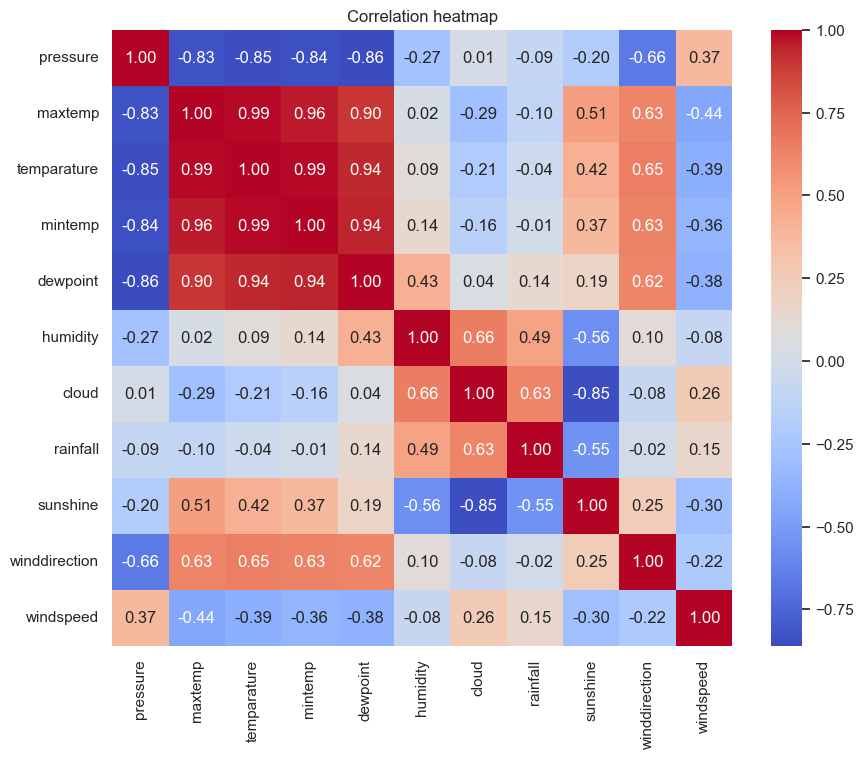

In [26]:
# correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# select only numeric columns for correlation
corr = data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()


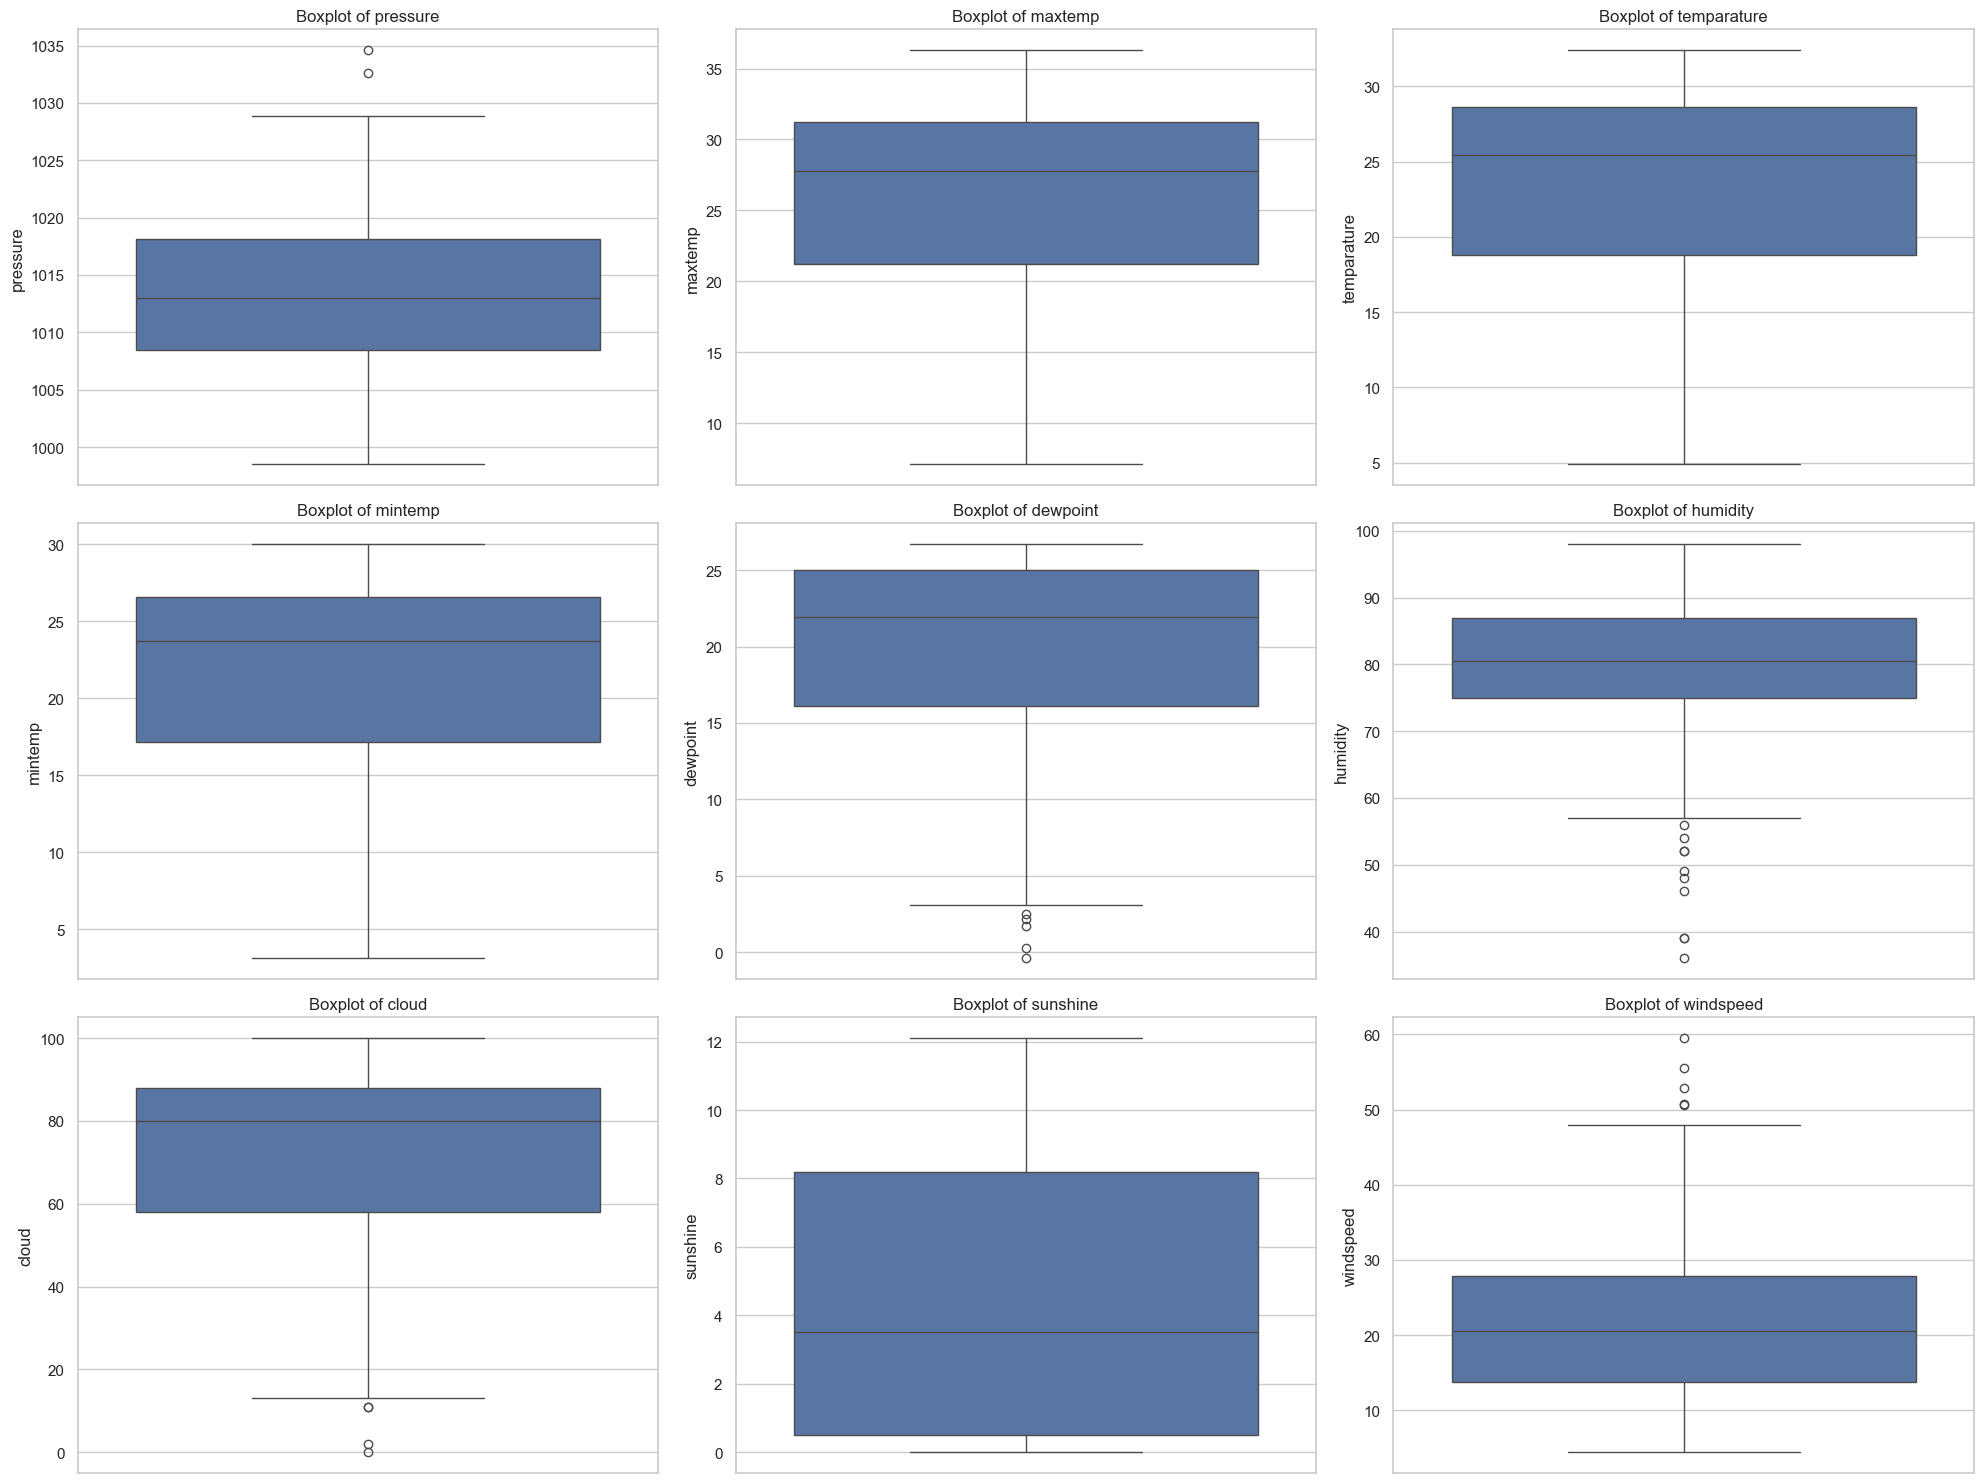

In [27]:
plt.figure(figsize=(20,15))  # adjust width & height

columns = ["pressure","maxtemp","temparature","mintemp",
           "dewpoint","humidity","cloud","sunshine","windspeed"]

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # use i instead of 1
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

# Data Preprocessing

In [28]:
# drop highly correlation column
data=data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [29]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [30]:
print(data["rainfall"].value_counts())


rainfall
1    249
0    117
Name: count, dtype: int64


In [31]:
# separate majaority and minority class 
df_majority = data[data['rainfall']== 1]
df_minority = data[data['rainfall']== 0]

In [32]:
df_majority.shape

(249, 8)

In [33]:
df_minority.shape

(117, 8)

In [34]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)


In [35]:
df_majority_downsampled.shape

(117, 8)

In [36]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
df_downsampled.shape

(234, 8)

In [37]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [38]:
# suffling the final dataframe
df_downsampled = df_downsampled.sample(frac = 1,random_state =42).reset_index(drop=True)

In [39]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [40]:
# splitting data into x and  y
x = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [41]:
x.shape


(234, 7)

In [42]:
y.shape

(234,)

# Train_Test_Split

In [43]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)


# Model_Training 

In [49]:
ranf_model = RandomForestClassifier(random_state=42)
param_grid_ranf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],   
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [50]:
grid_search_ranf = GridSearchCV(
    estimator=ranf_model,
    param_grid=param_grid_ranf,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search_ranf.fit(X_train, y_train)
best_ranf_model = grid_search_ranf.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [51]:
print("Best parameters for Random Forest:", grid_search_ranf.best_params_)
print("Best cross-validation score:", grid_search_ranf.best_score_)

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8136557610241821


# Model Evaluation 


In [56]:
cv_scores = cross_val_score(best_ranf_model, X_train, y_train, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

Cross Validation Scores: [0.68421053 0.78947368 0.86486486 0.81081081 0.91891892]
Mean Cross Validation Score: 0.8136557610241821


In [57]:
# test set performance
y_pred = best_ranf_model.predict(x_test)
print("test set Accuracy",accuracy_score(y_test, y_pred))
print("Test set confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

test set Accuracy 0.723404255319149
Test set confusion Matrix:
 [[16  8]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.69      0.78      0.73        23

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47



In [61]:
# Prediction on unknown data
input_data = (1015,9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns = ['pressure', 'maxtemp', 'temparature', 'humidity',
           'cloud', 'sunshine', 'winddirection', 'windspeed']
)

In [62]:
input_df

,pressure,maxtemp,temparature,humidity,cloud,sunshine,winddirection,windspeed
0,1015,9,19.9,95,81,0.0,40.0,13.7


In [65]:
model_cols = X_train.columns.tolist()
print("Model expects these columns:\n", model_cols)

raw_values = (1015, 9, 19.9, 95, 81, 0.0, 40.0, 13.7)
raw_cols = ['pressure', 'maxtemp', 'temparature', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

input_df_raw = pd.DataFrame([raw_values], columns=raw_cols)

input_df = input_df_raw.loc[:, input_df_raw.columns.intersection(model_cols)].copy()

missing_cols = [c for c in model_cols if c not in input_df.columns]
if missing_cols:
    print("Missing columns (will be filled with training column means):", missing_cols)
    col_means = X_train[missing_cols].mean()
    for c in missing_cols:
        fill_val = col_means[c] if not np.isnan(col_means[c]) else 0
        input_df[c] = fill_val

input_df = input_df[model_cols]

print("Final input for model:\n", input_df)

prediction = best_ranf_model.predict(input_df)
print("Prediction Result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Model expects these columns:
 ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
Missing columns (will be filled with training column means): ['dewpoint']
Final input for model:
    pressure   dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1015  19.782353        95     81       0.0           40.0       13.7
Prediction Result: Rainfall


In [68]:
# Save our Model 
joblib.dump(ranf_model, "random_forest_model.pkl")

['random_forest_model.pkl']